In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_25564\3717026788.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('DrDoS_LDAP_new.csv')


In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [4]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [5]:
l = []
for col in df1:
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [6]:
df1.drop(l, axis=1, inplace=True)

In [7]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [8]:
from sklearn.utils import resample


majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]


minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)


majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)


balanced_df = pd.concat([minority_upsampled, majority_downsampled])


balanced_df = balanced_df.sample(frac=1, random_state=42)

In [9]:
copy_df = balanced_df.copy()

In [10]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))

50000 50000


In [11]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [12]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [14]:
xords = []
yxxtest = []
yxxtrain = []

In [15]:
from sklearn.metrics import classification_report

In [16]:
for num in range(1,65):
    xords.append(num)
#     print(num)
    top_features = feature_importance_df.head(num)
#     print(len(top_features))
    x = list(top_features['Feature'])
    x.append(' Label')
    copy_df = balanced_df.copy()
    for i in copy_df.columns:
        if i not in x:
            copy_df.drop(i, axis=1, inplace=True)
    X = copy_df.drop(columns = ' Label', axis=1)
    y = copy_df[' Label']
    scaler = StandardScaler()
    scaler.fit(X)
    standardized_data = scaler.transform(X)
    dfX = pd.DataFrame(standardized_data, columns=X.columns)
    X_train, X_test, Y_train, Y_test = train_test_split(dfX, y, test_size=0.2, stratify=y, random_state=2)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
#     print('Accuracy on Training data : ', training_data_accuracy)
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
#     print('Accuracy on Test data : ', test_data_accuracy)
    yxxtest.append(test_data_accuracy)
    yxxtrain.append(training_data_accuracy)
    print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              preci

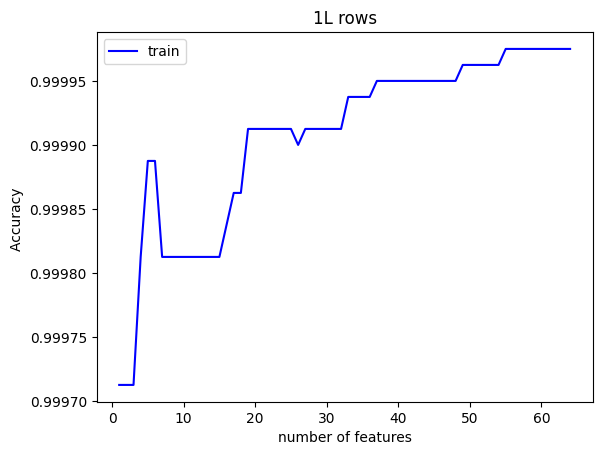

In [17]:
plt.plot(xords, yxxtrain, color='blue', label='train')

# plt.plot(xords, yxxtest, color='red', label='test')
plt.xlabel('number of features')
plt.ylabel('Accuracy ')
plt.title('1L rows')
plt.legend()

# Show the combined plot
plt.show()

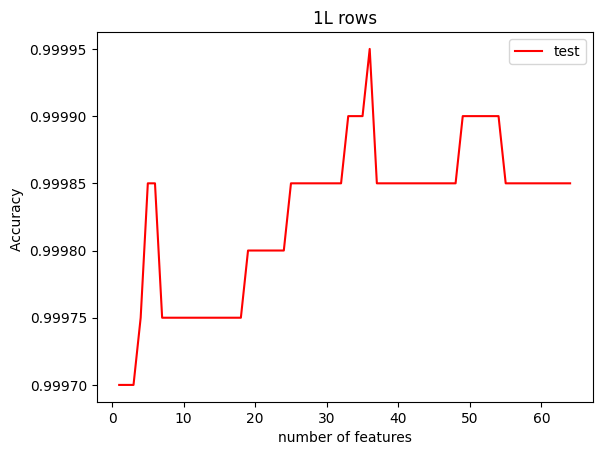

In [18]:
# plt.plot(xords, yxxtrain, color='blue', label='train')

plt.plot(xords, yxxtest, color='red', label='test')
plt.xlabel('number of features')
plt.ylabel('Accuracy ')
plt.title('1L rows')
plt.legend()

# Show the combined plot
plt.show()

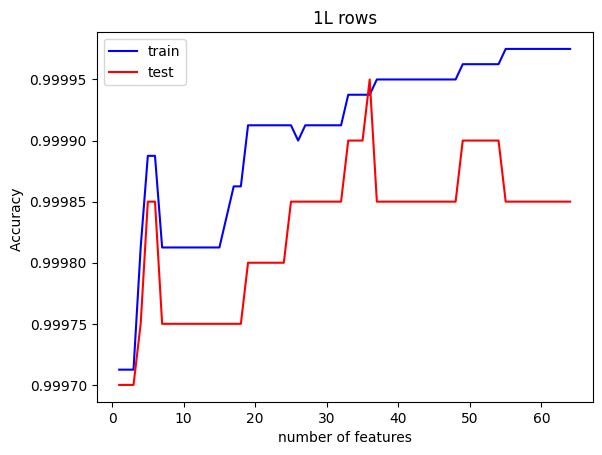

In [19]:
plt.plot(xords, yxxtrain, color='blue', label='train')

plt.plot(xords, yxxtest, color='red', label='test')
plt.xlabel('number of features')
plt.ylabel('Accuracy ')
plt.title('1L rows')
plt.legend()

# Show the combined plot
plt.show()